# Company Case Study

## 1. Statements

### 1.1. Business unterstanding

Company wants to introduce a new router model. To reduce the impact in case the router does not work as expected and to gain experience with the new model, the router is first introduced in two piloting regions using two different methods (method A and B). Contrary to method B, method A is a staggered rollout, furthermore the router has a slightly different configuration. Company plans to introduce the router in the remaining regions over the next months.

### 1.2. Analytic approach

•	At Company, customer calls is documented as “tickets”. So each ticket corresponds to a problem that the customer has with their internet connection.\
•	Therefore, the number of tickets can be used to estimate how error prone a router is.

*Customer tickets*\
	Column 1: when the ticket was opened\
	Column 2: unique customer number\
*Customers by region*\
	Column 1: unique customer number\
	Column 2: region the customer is located in

### 1.3. Data requirements

•	How many additional tickets should be expected in the remaining regions if method A or B is used?\
•	Which method would be recommended to management, and why?

## 2. Data processing

In [545]:
# Import necessary libraries, packages, and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

### 2.1. Data understanding

1. Load data
2. Take a sample
3. Show initial dataframe shape
4. Show data types
    * Change if applicable
5. Show analytical description
6. Show information
7. Check if dataframe contains null values
    * Drop null value
    * Fill null value
8. Check if dataframe contains duplicate values
    * Drop duplicates
    * Keep duplicates
9. Show final dataframe shape

#### A. Accounts dataframe

In [546]:
# 1. Load Accounts dataset
accounts_df = pd.read_csv("accounts_v2.csv", delimiter=",", header=0)

In [547]:
# 2. Display a sample of dataframe
accounts_df.sample(10)

,account_number,region
642901,2843478,Region 3
263700,9316480,Region 1
981107,1569048,Region 1
602359,1318395,Region 1
552026,4665803,Region 1
1028799,8910694,Region 1
1339921,6684499,Region 1
1252514,8389105,Region 1
117559,4481630,Region 5
791316,1915542,Region 5


In [548]:
# 3. Show initial dataframe shape
accounts_df.shape

(1400000, 2)

In [549]:
# 4. Show data types of each column
accounts_df.dtypes

account_number     int64
region            object
dtype: object

In [550]:
# 5. Desribe Account dataframe
accounts_df.describe(include="all")

,account_number,region
count,1.400000e+06,1400000
unique,NaN,6
top,NaN,Region 1
freq,NaN,419973
mean,5.498808e+06,NaN
std,2.597318e+06,NaN
min,1.000015e+06,NaN
25%,3.249971e+06,NaN
50%,5.501813e+06,NaN
75%,7.746915e+06,NaN


In [551]:
# 6. Show Account dataframe information
accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 2 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   account_number  1400000 non-null  int64 
 1   region          1400000 non-null  object
dtypes: int64(1), object(1)
memory usage: 21.4+ MB


In [552]:
# 7. Check if dataframe contains null values
accounts_df.isnull().sum()

account_number    0
region            0
dtype: int64

In [553]:
# 8.1. Check if dataframe contains duplicate values
accounts_df.duplicated().sum()

22077

In [554]:
# 8.2. Delete duplicate values
accounts_df.drop_duplicates(keep=False, inplace=True)

In [555]:
# 8.3. Check if account contains duplicates
accounts_df.duplicated("account_number").sum()

78640

In [556]:
# 8.4. Delete duplicate accounts
accounts_df.drop_duplicates(subset=["account_number"], keep=False, inplace=True)

In [557]:
# 9. Show final dataframe shape
accounts_df.shape

(1201192, 2)

#### B. Tickets dataframe

In [558]:
# 1. Load Tickets dataset
tickets_df = pd.read_csv("tickets_v2.csv", delimiter=",", header=0)

In [559]:
# 2. Display a sample of dataframe
tickets_df.sample(10)

,tag,account_number
466606,2020-08-12,8286150
197861,2019-10-05,9307328
757103,2021-06-02,5742980
809143,2021-07-22,5787843
406317,2020-06-04,7149276
68791,2019-04-09,4191411
496325,2020-09-11,4441026
328745,2020-03-03,6704413
582988,2020-12-10,1410997
739705,2021-05-15,6136724


In [560]:
# 3. Show initial dataframe shape
tickets_df.shape

(1025900, 2)

In [561]:
# 4. Show data types of each column
tickets_df.dtypes

tag               object
account_number     int64
dtype: object

In [562]:
# 4.1. Change data type for tag column
tickets_df["tag"] = pd.to_datetime(tickets_df["tag"])

In [563]:
# 5. Desribe Tickets dataframe
tickets_df.describe(include="all")

,tag,account_number
count,1025900,1.025900e+06
mean,2020-09-02 08:16:14.607270912,5.497297e+06
min,2019-01-01 00:00:00,1.000015e+06
25%,2019-12-13 00:00:00,3.245053e+06
50%,2020-09-30 00:00:00,5.501682e+06
75%,2021-06-14 00:00:00,7.750083e+06
max,2022-01-01 00:00:00,9.999997e+06
std,NaN,2.598229e+06


In [564]:
# 6. Show Tickets dataframe information
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025900 entries, 0 to 1025899
Data columns (total 2 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   tag             1025900 non-null  datetime64[ns]
 1   account_number  1025900 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.7 MB


In [565]:
# 7. Check if dataframe contains null values
tickets_df.isnull().sum()

tag               0
account_number    0
dtype: int64

In [566]:
# 8.1. Check if dataframe contains duplicate values
tickets_df.duplicated().sum()

458

In [567]:
# 8.2. Delete duplicate values
tickets_df.drop_duplicates(keep=False, inplace=True)

In [568]:
# 9. Show final dataframe shape
tickets_df.shape

(1024984, 2)

#### C. Common dataframe

In [569]:
# 1. Join dataframes
df = pd.merge(accounts_df, tickets_df, how="left", on="account_number")

In [570]:
# 2. Display a sample of dataframe
df.sample(10)

,account_number,region,tag
1057273,2543817,Region 3,NaT
386512,9517360,Region 2,2021-03-20
1033218,8521667,Region 1,2020-07-21
837036,6577784,Region 6,2021-01-12
1368211,4360241,Region 5,NaT
579640,8317393,Region 1,NaT
1132134,4890144,Region 5,2020-05-13
1162727,9142909,Region 1,2020-01-01
820971,7635385,Region 5,2021-09-08
556084,5929838,Region 4,2019-09-26


In [571]:
# 3. Show dataframe shape
df.shape

(1456203, 3)

In [572]:
# 4. Show data types of each column
df.dtypes

account_number             int64
region                    object
tag               datetime64[ns]
dtype: object

In [573]:
# 5. Desribe dataframe
df.describe(include="all")

,account_number,region,tag
count,1.456203e+06,1456203,876034
unique,NaN,6,NaN
top,NaN,Region 1,NaN
freq,NaN,432165,NaN
mean,5.498755e+06,NaN,2020-09-02 15:10:17.671916032
min,1.000015e+06,NaN,2019-01-01 00:00:00
25%,3.250259e+06,NaN,2019-12-13 00:00:00
50%,5.502973e+06,NaN,2020-09-30 00:00:00
75%,7.746496e+06,NaN,2021-06-15 00:00:00
max,9.999997e+06,NaN,2022-01-01 00:00:00


In [574]:
# 6. Show dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456203 entries, 0 to 1456202
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   account_number  1456203 non-null  int64         
 1   region          1456203 non-null  object        
 2   tag             876034 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 33.3+ MB


In [575]:
# 8. Check if dataframe contains duplicate values
tickets_df.duplicated().sum()

0

#### 2.2. Exploratory Data Analysis

1. Number of accounts per region
2. Plot number of accounts per region
3. Number of tickets per region
4. Plot number of tickets per region
5. Number of yearly tickets
6. Plot number of yearly tickets
7. Number of yearly tickets per region
8. Plot number of yearly tickets per region

In [576]:
# 1. Extract number of accounts per region
df["region"].value_counts()

region
Region 1    432165
Region 3    310312
Region 5    287586
Region 2    191581
Region 4    144105
Region 6     90454
Name: count, dtype: int64

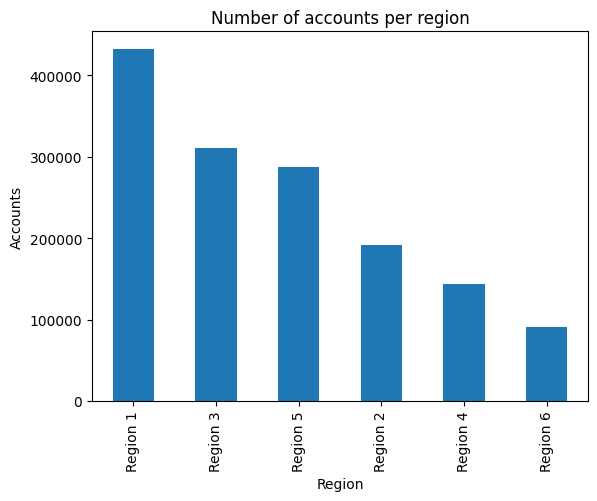

In [577]:
#  2. Visualize number of accounts per region
df["region"].value_counts().plot(kind="bar")
plt.title("Number of accounts per region")
plt.xlabel("Region")
plt.ylabel("Accounts")
plt.show()

In [578]:
# 3. Extract number of tickets per region
df.groupby("region")["tag"].count().sort_values(ascending=False)

region
Region 1    253847
Region 3    198130
Region 5    169467
Region 2    112984
Region 4     84865
Region 6     56741
Name: tag, dtype: int64

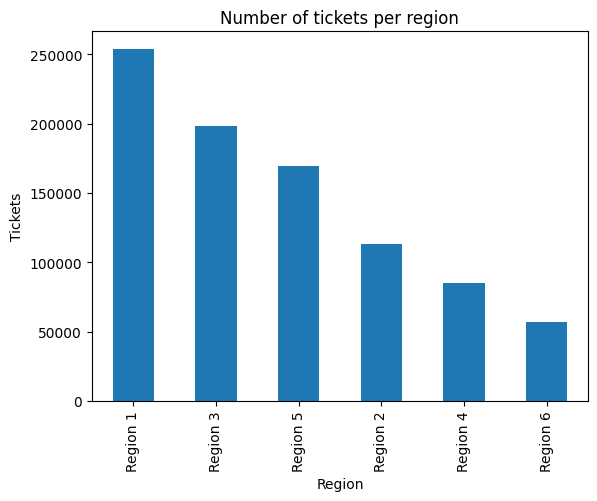

In [579]:
#  4. Visualize number of tickets per region
df.groupby("region")["tag"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Number of tickets per region")
plt.xlabel("Region")
plt.ylabel("Tickets")
plt.show()

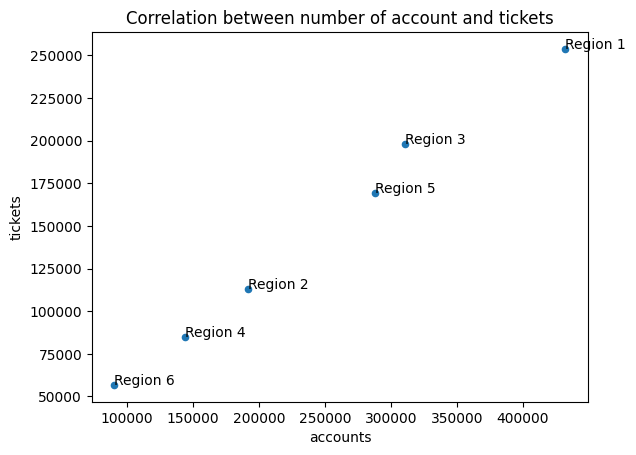

In [580]:
# 5. Visualize number of account and number of tickets
corr_df = pd.DataFrame(columns=["accounts", "tickets"])
corr_df["accounts"] = df["region"].value_counts().sort_values(ascending=False)
corr_df["tickets"] = df.groupby("region")["tag"].count().sort_values(ascending=False)
corr_df = corr_df.reset_index()

ax = corr_df.plot(x='accounts', y='tickets', kind='scatter')
corr_df[['accounts', 'tickets', 'region']].apply(lambda x: ax.text(*x), axis=1)
plt.title("Correlation between number of account and tickets")
plt.show()

In [581]:
# 6. Number of yearly tickets
df["year"] = df["tag"].dt.year
df["year"] = df["year"].fillna(0.0).astype(int)

df = df[df.year != 0]

df["year"].value_counts()

year
2021    361406
2020    282624
2019    231699
2022       305
Name: count, dtype: int64

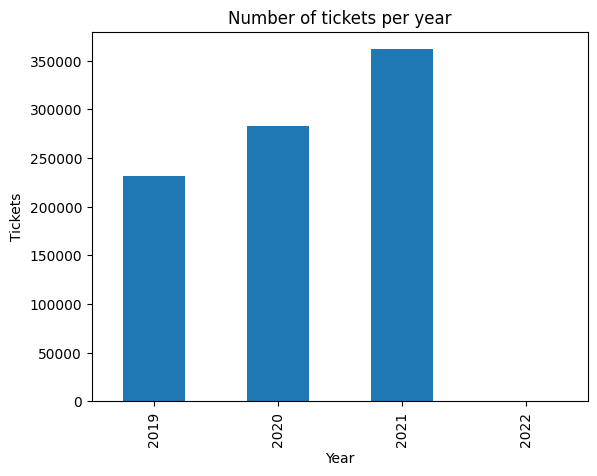

In [582]:
# 7. Visualize number of yearly tickets
df.groupby("year")["tag"].count().plot(kind="bar")
plt.title("Number of tickets per year")
plt.xlabel("Year")
plt.ylabel("Tickets")
plt.show()

In [583]:
# 8. Number of yearly tickets per region
df.groupby(["year", "region"])["tag"].count()

year  region  
2019  Region 1    69305
      Region 2    30752
      Region 3    47817
      Region 4    23303
      Region 5    46438
      Region 6    14084
2020  Region 1    84573
      Region 2    37674
      Region 3    58598
      Region 4    28141
      Region 5    56434
      Region 6    17204
2021  Region 1    99903
      Region 2    44533
      Region 3    91583
      Region 4    33403
      Region 5    66554
      Region 6    25430
2022  Region 1       66
      Region 2       25
      Region 3      132
      Region 4       18
      Region 5       41
      Region 6       23
Name: tag, dtype: int64

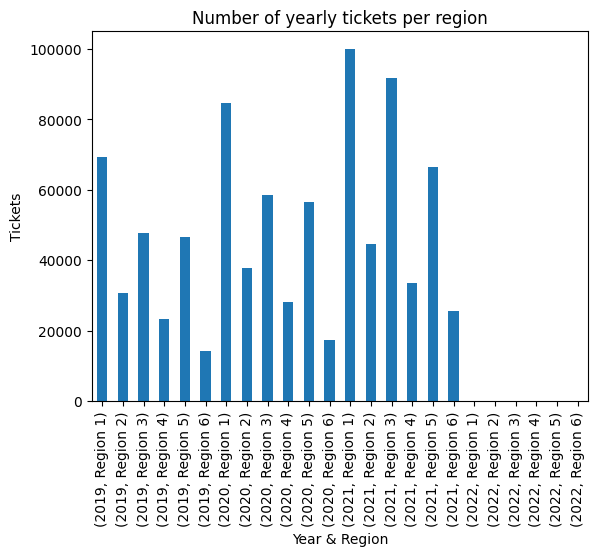

In [584]:
# 9. Visualize number of yearly tickets per region
df.groupby(["year", "region"])["tag"].count().plot.bar()
plt.title("Number of yearly tickets per region")
plt.xlabel("Year & Region")
plt.ylabel("Tickets")
plt.show()

In [585]:
# 10. Number of monthly tickets
df["month"] = df["tag"].dt.month

df.groupby(by=["year", "month"]).count()



account_number  region    tag
year month                               
2019 1               18250   18250  18250
     2               16628   16628  16628
     3               18522   18522  18522
     4               17222   17222  17222
     5               19399   19399  19399
     6               16506   16506  16506
     7               19103   19103  19103
     8               21125   21125  21125
     9               19111   19111  19111
     10              22644   22644  22644
     11              20337   20337  20337
     12              22852   22852  22852
2020 1               24215   24215  24215
     2               23116   23116  23116
     3               24036   24036  24036
     4               20714   20714  20714
     5               20394   20394  20394
     6               21265   21265  21265
     7               24492   24492  24492
     8               24919   24919  24919
     9               23607   23607  23607
     10              25725   25725  25725
     11              24577   24577  24577
     12              25564   25564  25564
2021 1               27974   27974  27974
     2               24765   24765  24765
     3               27809   27809  27809
     4               25044   25044  25044
     5               24279   24279  24279
     6               27913   27913  27913
     7               27200   27200  27200
     8               28882   28882  28882
     9               31298   31298  31298
     10              46335   46335  46335
     11              36437   36437  36437
     12              33470   33470  33470
2022 1                 305     305    305

In [586]:
# 11.1. Check if data from 2022 are revelant
df["tag"].loc[df["year"] >= 2022].unique()

<DatetimeArray>
['2022-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [587]:
# 11.2. Delete records from 2022
df = df[df.year != 2022]

In [588]:
# 12. Calculate Number of tickets per region, per year, and per month
df.groupby(["region", "year", "month"])["tag"].count()

region    year  month
Region 1  2019  1        5423
                2        4981
                3        5551
                4        5223
                5        5860
                         ... 
Region 6  2021  8        1745
                9        1863
                10       6888
                11       1934
                12       2021
Name: tag, Length: 216, dtype: int64

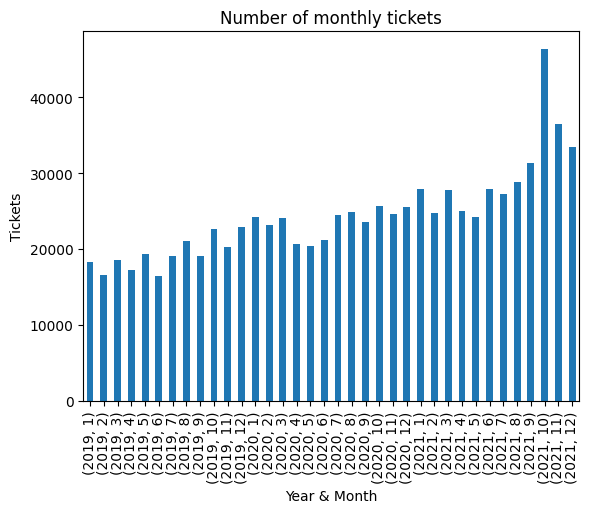

In [589]:
# 13. Visualize number of ticket per year and per month
df.groupby(["year", "month"])["tag"].count().plot.bar()
plt.title("Number of monthly tickets")
plt.xlabel("Year & Month")
plt.ylabel("Tickets")
plt.show()

In [590]:
# 14.1. Create dataframe for further analysis
work_df = pd.DataFrame()
work_df = df.groupby(["region", "year", "month"])["tag"].count().reset_index()

In [591]:
# 14.2. Update new dataframe with number of account per region
accounts = []

for index in range(6):
    for _ in range(36):
        accounts.append(df["region"].value_counts().iloc[index])

work_df["No_Accounts"] = accounts

In [592]:
# 14.3. Rename columns in new dataframe
work_df.rename(columns={"region": "Region", "year": "Year", "month": "Month", "tag": "No_Tickets"}, inplace=True)

In [593]:
# 14.4. Add coefficients to new dataframe
work_df["Coefficient"] = work_df["No_Tickets"] / work_df["No_Accounts"]

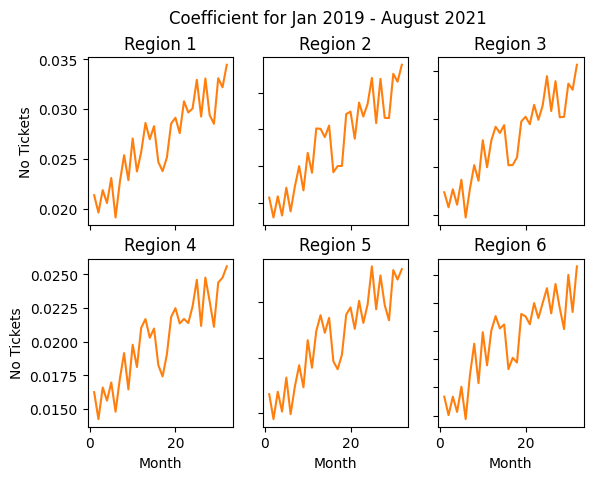

In [594]:
# 15.1. Visualize coefficient state for regions in before new router configuration
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

fig, axs = plt.subplots(2, 3)
fig.suptitle('Coefficient for Jan 2019 - August 2021')

axs[0, 0].plot(months[:-4], work_df.loc[0:31, "Coefficient"], 'tab:orange')
axs[0, 0].set_title('Region 1')

axs[0, 1].plot(months[:-4], work_df.loc[36:67, "Coefficient"], 'tab:orange')
axs[0, 1].set_title('Region 2')

axs[0, 2].plot(months[:-4], work_df.loc[72:103, "Coefficient"], 'tab:orange')
axs[0, 2].set_title('Region 3')

axs[1, 0].plot(months[:-4], work_df.loc[108:139, "Coefficient"], 'tab:orange')
axs[1, 0].set_title('Region 4')

axs[1, 1].plot(months[:-4], work_df.loc[144:175, "Coefficient"], 'tab:orange')
axs[1, 1].set_title('Region 5')

axs[1, 2].plot(months[:-4], work_df.loc[180:211, "Coefficient"], 'tab:orange')
axs[1, 2].set_title('Region 6')

for ax in axs.flat:
    ax.set(xlabel='Month', ylabel='No Tickets')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

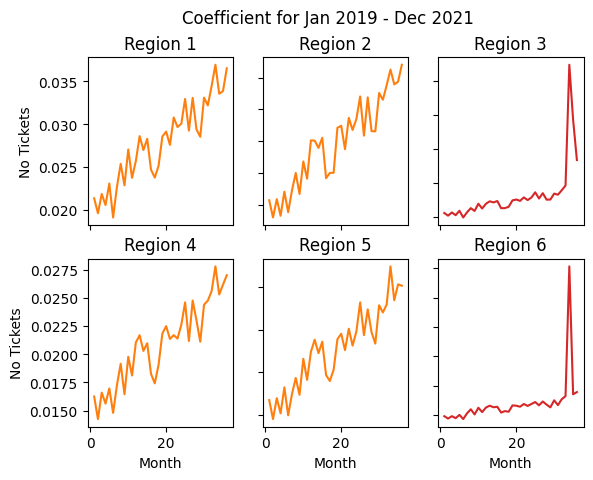

In [595]:
# 15.2. Visualize coefficient state for regions after new router configuration
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

fig, axs = plt.subplots(2, 3)
fig.suptitle('Coefficient for Jan 2019 - Dec 2021')

axs[0, 0].plot(months, work_df.loc[0:35, "Coefficient"], 'tab:orange')
axs[0, 0].set_title('Region 1')

axs[0, 1].plot(months, work_df.loc[36:71, "Coefficient"], 'tab:orange')
axs[0, 1].set_title('Region 2')

axs[0, 2].plot(months, work_df.loc[72:107, "Coefficient"], 'tab:red')
axs[0, 2].set_title('Region 3')

axs[1, 0].plot(months, work_df.loc[108:143, "Coefficient"], 'tab:orange')
axs[1, 0].set_title('Region 4')

axs[1, 1].plot(months, work_df.loc[144:179, "Coefficient"], 'tab:orange')
axs[1, 1].set_title('Region 5')

axs[1, 2].plot(months, work_df.loc[180:215, "Coefficient"], 'tab:red')
axs[1, 2].set_title('Region 6')

for ax in axs.flat:
    ax.set(xlabel='Month', ylabel='No Tickets')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## 3. Model build

3.1. Modeling

In [596]:
# 1. Create features and predicted values
X = work_df.iloc[:, [0, 1, 2]].values
y = work_df.iloc[:, 3].values

In [597]:
# 2. Transform categorical feature to numerical
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [598]:
# 3. Split dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [599]:
# 4. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [600]:
# 5. Predict values from test data
y_pred = model.predict(X_test)

3.2. Evaluation

In [601]:
# 1. Evaluate performance of the model
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

## 4. Insights

In [ ]:
# 1.1. Create functionality for predicted values for current configuration

def make_prediction(region_number, year, months_index):

    # Create values for regions
    regions = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    regions[region_number - 1] = 1.0
    r_1, r_2, r_3, r_4, r_5, r_6 = regions

    # Establish month index and name
    months = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
    start_month = months_index[0]
    final_month = months_index[-1]

    # Establish the year
    year_value = year

    # Display region and router configuration
    print(f"In Region {region_number}, in current conditions, expected number of tickets will be:")

    # Initialize list of predicted number of tickets
    no_tickets = []

    # Generate prediction for each desired month
    for month_index in range(start_month, final_month + 1):
        predict = model.predict([[r_1, r_2, r_3, r_4, r_5, r_6, year_value, month_index]]).tolist()
        no_tickets.append(int(predict[0]))
        print(f"- for {months[month_index]} {year_value}: {int(predict[0])} tickets.")
    print("")

    # Return list of predicted number of tickets
    return no_tickets

In [ ]:

# 1.2. Make predictions for current configuration for all regions
for i in range(1, 7):
    make_prediction(i, 2022, [1, 3])

In Region 1, in current conditions, expected number of tickets will be:
- for January 2022: 8375 tickets.
- for February 2022: 8476 tickets.
- for March 2022: 8577 tickets.

In Region 2, in current conditions, expected number of tickets will be:
- for January 2022: 4431 tickets.
- for February 2022: 4532 tickets.
- for March 2022: 4634 tickets.

In Region 3, in current conditions, expected number of tickets will be:
- for January 2022: 6880 tickets.
- for February 2022: 6981 tickets.
- for March 2022: 7082 tickets.

In Region 4, in current conditions, expected number of tickets will be:
- for January 2022: 3702 tickets.
- for February 2022: 3803 tickets.
- for March 2022: 3904 tickets.

In Region 5, in current conditions, expected number of tickets will be:
- for January 2022: 5997 tickets.
- for February 2022: 6098 tickets.
- for March 2022: 6199 tickets.

In Region 6, in current conditions, expected number of tickets will be:
- for January 2022: 2847 tickets.
- for February 2022: 294

In [ ]:
# 2. Extract mean coefficient per each region
avg_coef_df = work_df.groupby(by="Region").mean()
avg_coef_df.iloc[5, 4]

# Calculate max and mean coefficient from region 3 and 6
mean_A = work_df.loc[72:104, "Coefficient"].mean()
max_A = work_df.loc[72:107, "Coefficient"].max()

mean_B = work_df.loc[180:212, "Coefficient"].mean()
max_B = work_df.loc[180:215, "Coefficient"].max()

# Make assumption based on router configuration
impact_method_A = max_A / mean_A
impact_method_B = max_B / mean_B

In [ ]:
# 3.1. Create functionality for predicted values for new configuration

def make_new_prediction(region_number, year, months_index, method_option):
    
    # Create values for regions
    regions = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    regions[region_number - 1] = 1.0
    r_1, r_2, r_3, r_4, r_5, r_6 = regions

    # Establish month index and name
    months = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
    start_month = months_index[0]
    final_month = months_index[-1]

    # Establish the year
    year_value = year

    # Set coefficient value based on method used
    if method_option == "A":
        coefficient = impact_method_A
    elif method_option == "B":
        coefficient = impact_method_B
    else:
        coefficient = 1
    
    # Display region and router configuration
    print(f"In Region {region_number}, using method {method_option}, expected number of tickets will be:")

    # Initialize list of predicted number of tickets
    no_tickets = []

    # Generate prediction for each desired month
    for index in range(start_month, final_month + 1):
        predict = model.predict([[r_1, r_2, r_3, r_4, r_5, r_6, year_value, index]]).tolist()
        new_predict = int(int(predict[0]) * coefficient)
        no_tickets.append(new_predict)
        print(f"- for {months[index]} {year_value}: {new_predict} tickets.")
    print("")

    # Return list of predicted number of tickets
    return no_tickets

In [ ]:
# 3.2. Make predictions for configuration with method A for all regions
for i in range(1, 7):
    make_new_prediction(i, 2022, [1, 3], "A")

In Region 1, using method A, expected number of tickets will be:
- for January 2022: 32538 tickets.
- for February 2022: 32930 tickets.
- for March 2022: 33323 tickets.

In Region 2, using method A, expected number of tickets will be:
- for January 2022: 17215 tickets.
- for February 2022: 17607 tickets.
- for March 2022: 18004 tickets.

In Region 3, using method A, expected number of tickets will be:
- for January 2022: 26730 tickets.
- for February 2022: 27122 tickets.
- for March 2022: 27515 tickets.

In Region 4, using method A, expected number of tickets will be:
- for January 2022: 14383 tickets.
- for February 2022: 14775 tickets.
- for March 2022: 15167 tickets.

In Region 5, using method A, expected number of tickets will be:
- for January 2022: 23299 tickets.
- for February 2022: 23691 tickets.
- for March 2022: 24084 tickets.

In Region 6, using method A, expected number of tickets will be:
- for January 2022: 11061 tickets.
- for February 2022: 11457 tickets.
- for March 20

In [ ]:
# 3.3. Make predictions for configuration with method B for all regions
for i in range(1, 7):
    make_new_prediction(i, 2022, [1, 3], "B")

In Region 1, using method B, expected number of tickets will be:
- for January 2022: 41496 tickets.
- for February 2022: 41997 tickets.
- for March 2022: 42497 tickets.

In Region 2, using method B, expected number of tickets will be:
- for January 2022: 21954 tickets.
- for February 2022: 22455 tickets.
- for March 2022: 22960 tickets.

In Region 3, using method B, expected number of tickets will be:
- for January 2022: 34089 tickets.
- for February 2022: 34589 tickets.
- for March 2022: 35090 tickets.

In Region 4, using method B, expected number of tickets will be:
- for January 2022: 18342 tickets.
- for February 2022: 18843 tickets.
- for March 2022: 19343 tickets.

In Region 5, using method B, expected number of tickets will be:
- for January 2022: 29714 tickets.
- for February 2022: 30214 tickets.
- for March 2022: 30715 tickets.

In Region 6, using method B, expected number of tickets will be:
- for January 2022: 14106 tickets.
- for February 2022: 14611 tickets.
- for March 20

In [ ]:
# 4.1. Create functionality for method recommendation

def recommend_method(values_a, values_b):
    if sum(values_a) < sum(values_b):
        print(f"Recommended method is A.")
    elif sum(values_a) > sum(values_b):
        print(f"Recommended method is B.")
    else:
        print(f"Recommended method is not clear detected.")

In [ ]:
# 4.2. Make recommendation of the method to be used
for i in range(1, 7):
    list_a = make_new_prediction(i, 2024, [1, 12], "A")
    list_b = make_new_prediction(i, 2024, [1, 12], "B")

recommend_method(list_a, list_b)

In Region 1, using method A, expected number of tickets will be:
- for January 2024: 39667 tickets.
- for February 2024: 40064 tickets.
- for March 2024: 40456 tickets.
- for April 2024: 40849 tickets.
- for May 2024: 41245 tickets.
- for June 2024: 41637 tickets.
- for July 2024: 42030 tickets.
- for August 2024: 42426 tickets.
- for September 2024: 42818 tickets.
- for October 2024: 43211 tickets.
- for November 2024: 43603 tickets.
- for December 2024: 43999 tickets.

In Region 1, using method B, expected number of tickets will be:
- for January 2024: 50589 tickets.
- for February 2024: 51094 tickets.
- for March 2024: 51594 tickets.
- for April 2024: 52095 tickets.
- for May 2024: 52600 tickets.
- for June 2024: 53101 tickets.
- for July 2024: 53601 tickets.
- for August 2024: 54107 tickets.
- for September 2024: 54607 tickets.
- for October 2024: 55107 tickets.
- for November 2024: 55608 tickets.
- for December 2024: 56113 tickets.

In Region 2, using method A, expected number of 

In Region 1, using method A, expected number of tickets will be:
- for January 2024: 39667 tickets.
- for February 2024: 40064 tickets.
- for March 2024: 40456 tickets.

In Region 2, using method A, expected number of tickets will be:
- for January 2024: 24348 tickets.
- for February 2024: 24740 tickets.
- for March 2024: 25137 tickets.

In Region 4, using method A, expected number of tickets will be:
- for January 2024: 21516 tickets.
- for February 2024: 21908 tickets.
- for March 2024: 22301 tickets.

In Region 5, using method A, expected number of tickets will be:
- for January 2024: 30432 tickets.
- for February 2024: 30825 tickets.
- for March 2024: 31217 tickets.

In Region 1, using method B, expected number of tickets will be:
- for January 2024: 50589 tickets.
- for February 2024: 51094 tickets.
- for March 2024: 51594 tickets.

In Region 2, using method B, expected number of tickets will be:
- for January 2024: 31052 tickets.
- for February 2024: 31552 tickets.
- for March 20

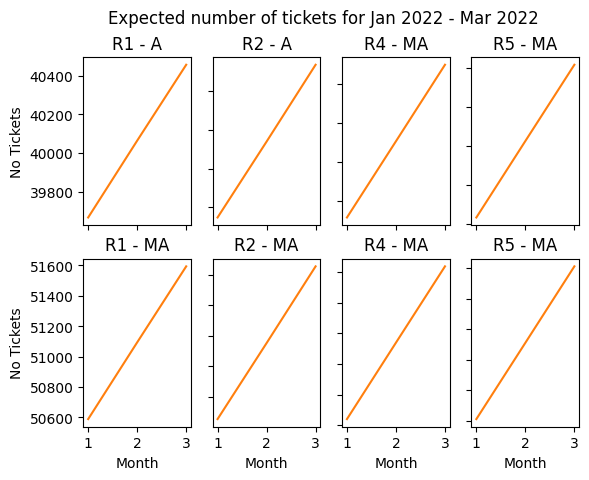

In [ ]:
# 5. Visualize predicted number of tickets
months = [1,2,3]

reg_1_a = make_new_prediction(1, 2024, [1, 3], "A")
reg_2_a = make_new_prediction(2, 2024, [1, 3], "A")
reg_4_a = make_new_prediction(4, 2024, [1, 3], "A")
reg_5_a = make_new_prediction(5, 2024, [1, 3], "A")
reg_1_b = make_new_prediction(1, 2024, [1, 3], "B")
reg_2_b = make_new_prediction(2, 2024, [1, 3], "B")
reg_4_b = make_new_prediction(4, 2024, [1, 3], "B")
reg_5_b = make_new_prediction(5, 2024, [1, 3], "B")

fig, axs = plt.subplots(2, 4)
fig.suptitle('Expected number of tickets for Jan 2022 - Mar 2022')

axs[0, 0].plot(months, reg_1_a, 'tab:orange')
axs[0, 0].set_title('R1 - A')

axs[0, 1].plot(months, reg_2_a, 'tab:orange')
axs[0, 1].set_title('R2 - A')

axs[0, 2].plot(months, reg_4_a, 'tab:orange')
axs[0, 2].set_title('R4 - MA')

axs[0, 3].plot(months, reg_5_a, 'tab:orange')
axs[0, 3].set_title('R5 - MA')

axs[1, 0].plot(months, reg_1_b, 'tab:orange')
axs[1, 0].set_title('R1 - MA')

axs[1, 1].plot(months, reg_2_b, 'tab:orange')
axs[1, 1].set_title('R2 - MA')

axs[1, 2].plot(months, reg_4_b, 'tab:orange')
axs[1, 2].set_title('R4 - MA')

axs[1, 3].plot(months, reg_5_b, 'tab:orange')
axs[1, 3].set_title('R5 - MA')

for ax in axs.flat:
    ax.set(xlabel='Month', ylabel='No Tickets')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
            ax.label_outer()